In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [4]:
#Reading the dataset
customer_data = pd.read_csv("/Users/jeronimoperezrocha/Library/Containers/com.microsoft.Excel/Data/Downloads/customer_clustering_example.csv")
print(customer_data)

     Annual Income (k$)  Spending Score (1-100)
0             32.483571               58.617357
1             33.238443               75.230299
2             28.829233               57.658630
3             37.896064               67.674347
4             27.652628               65.425600
..                  ...                     ...
295           55.357831               35.223426
296           57.394899               43.336621
297           60.187700               34.899836
298           53.650625               30.212363
299           52.778534               43.773005

[300 rows x 2 columns]


Implementing the Elbow Method for finding the optimal number of clusters

In [5]:
%%capture
sse = [] #Sum of squared distances
for k in range(1,11): #Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data)
    sse.append(kmeans.inertia_)

Plotting the iterated kmeans

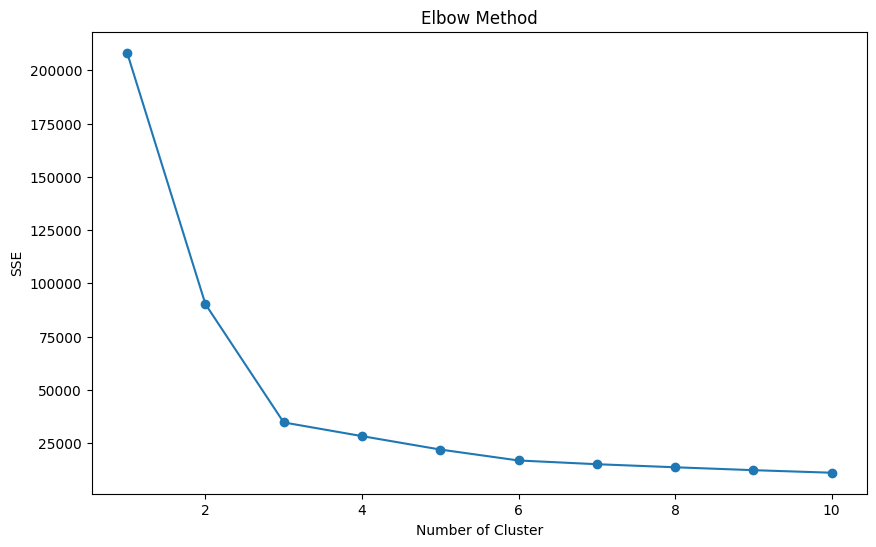

In [6]:
#Plotting the SSE for each K to visualize the Elbow
plt.figure(figsize=(10,6))
plt.plot(range(1,11), sse, marker='o') #range (1,11) on the x-axis, sse on the y-axis
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

The Optimal number of clusters, k=3

In [7]:
%%capture
k_optimal= 3
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
customer_data['clusters'] = kmeans_optimal.fit_predict(customer_data)

In [8]:
#Let's Describe the clusters now
cluster_centroids = kmeans_optimal.cluster_centers_
cluster_sizes = customer_data['clusters'].value_counts()


print("Cluster Centroids:\n", cluster_centroids)
print("Cluster Sizes:\n",cluster_sizes)

Cluster Centroids:
 [[70.51770566 80.25935225]
 [54.74057977 38.49515545]
 [29.42217873 60.34022324]]
Cluster Sizes:
 0    101
2    100
1     99
Name: clusters, dtype: int64


Plotting the clusters for visual inspection

In [9]:
customer_data.head()

,Annual Income (k$),Spending Score (1-100),clusters
0,32.483571,58.617357,2
1,33.238443,75.230299,2
2,28.829233,57.658630,2
3,37.896064,67.674347,2
4,27.652628,65.425600,2


Text(0, 0.5, 'Spending Score')

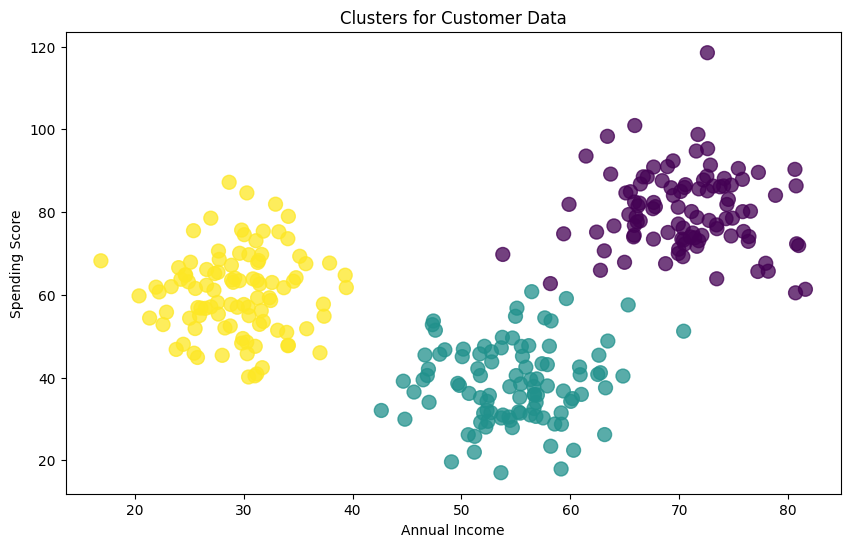

In [10]:
#Visualizing the clusters
plt.figure(figsize=(10,6))
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], c=customer_data['clusters'], cmap= 'viridis', marker ='o', s=100, alpha = 0.75 )
plt.title('Clusters for Customer Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

Evaluation Metrics - Did the Clustering go well? 

In [11]:
#Calculate the Silhouette score 
silhouette_avg = silhouette_score(customer_data, customer_data['clusters'])
print(f'Sil Score for {k_optimal} Clusters: {silhouette_avg}')

#Calcualte the Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(customer_data, customer_data['clusters'])
print(f'DB Score for {k_optimal}, clusters: {davies_bouldin_avg}')

Sil Score for 3 Clusters: 0.6339263030915369
DB Score for 3, clusters: 0.5128687323843248


Sil Score: Measures of how similar a data point is to its own cluster compared to other clusters

Range: -1 to 1
A high value would mean that the point us well matched of its own cluster nut poorly  matched to neighboring clusters. 
A low or negative value would mean that the clusters are overlapping and perhaps too many clusters were created

DB Score or Index: Measure of the Average similarity between clusters. It is the calculated using the ration of the sum of within cluster distances

Range:0 +Infinity a lower DB Index/Score indicated that the clusters are well separated and compact (similar within) 

In [12]:
%%capture
#Without the Elbow Method, the optimal clusters can be found by: 

sil_score = [] #Silhouette score
k_values = range(2,11)
for k in k_values: #Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(customer_data)
    silhouette_avg = silhouette_score(customer_data, cluster_labels)
    sil_score.append(silhouette_avg)
    
#Determining the Optimal number of clusters
k_optimal = k_values[sil_score.index(max(sil_score))]

In [13]:
print(f'Optimal Number of Clusters: {k_optimal}')
print(f'Silhouette Score for {k_optimal} Clusters: {max(sil_score)}')

Optimal Number of Clusters: 3
Silhouette Score for 3 Clusters: 0.6339263030915369


In [21]:
%%capture
#Attempting to find the optimal number of clusters using the Davies-Bouldin Index
db_score = [] #Silhouette score
k_values = range(2,11)
for k in k_values: #Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(customer_data)
    davies_bouldin_avg = davies_bouldin_score(customer_data, cluster_labels)
    db_score.append(davies_bouldin_avg)
    
#Determining the Optimal number of clusters
k_optimal = k_values[db_score.index(min(db_score))]

In [18]:
print(f'Optimal Number of Clusters: {k_optimal}')
print(f'Davies-Bouldin Score for {k_optimal} Clusters: {min(db_score)}')

Optimal Number of Clusters: 3
Davies-Bouldin Score for 3 Clusters: 0.8993692873093679
